In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import os

In [3]:
def load_data(path, data_type="train"):
  file_path = os.path.join(path, (data_type + ".xlsx"))
  return pd.read_excel(file_path)

In [4]:
data_path = "/content/drive/MyDrive/device_price_classification_data/"
data = load_data(data_path)
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


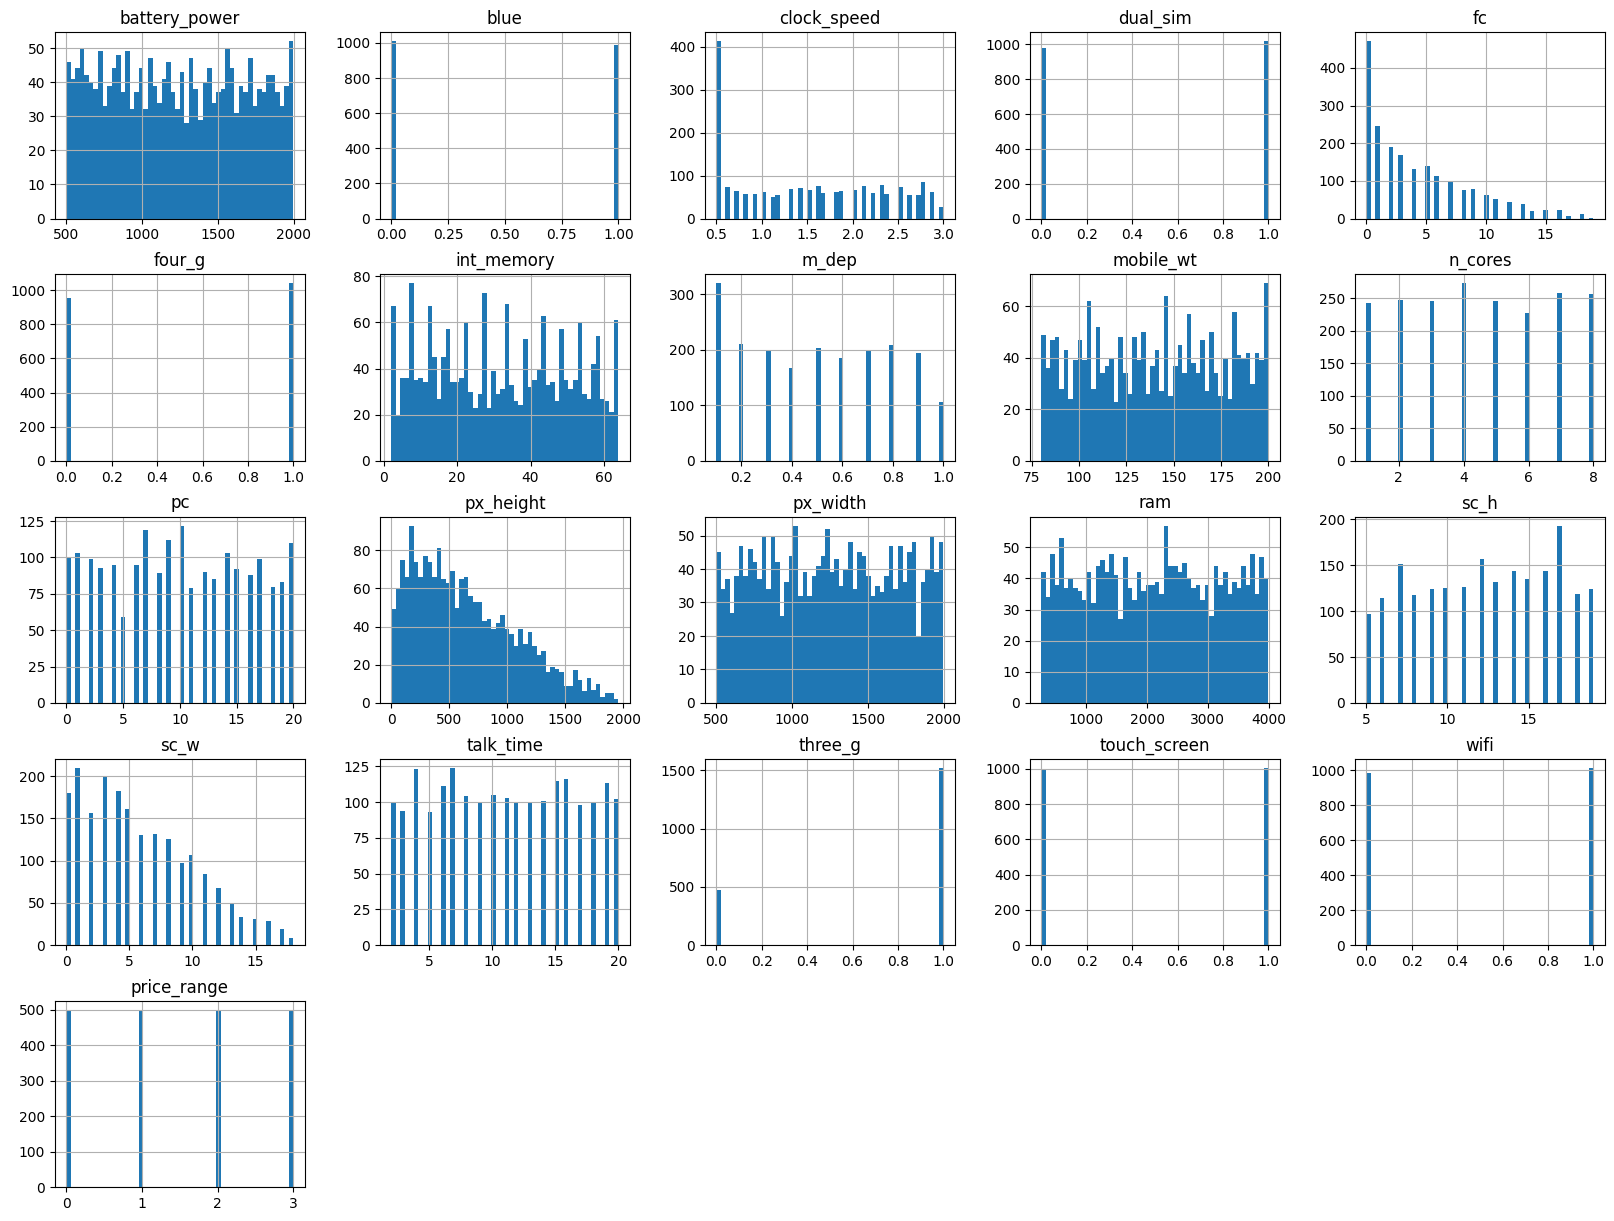

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

data.hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
data["price_range"].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [7]:
len(list(data.columns))


21

array([[<Axes: xlabel='battery_power', ylabel='battery_power'>,
        <Axes: xlabel='clock_speed', ylabel='battery_power'>,
        <Axes: xlabel='mobile_wt', ylabel='battery_power'>,
        <Axes: xlabel='int_memory', ylabel='battery_power'>],
       [<Axes: xlabel='battery_power', ylabel='clock_speed'>,
        <Axes: xlabel='clock_speed', ylabel='clock_speed'>,
        <Axes: xlabel='mobile_wt', ylabel='clock_speed'>,
        <Axes: xlabel='int_memory', ylabel='clock_speed'>],
       [<Axes: xlabel='battery_power', ylabel='mobile_wt'>,
        <Axes: xlabel='clock_speed', ylabel='mobile_wt'>,
        <Axes: xlabel='mobile_wt', ylabel='mobile_wt'>,
        <Axes: xlabel='int_memory', ylabel='mobile_wt'>],
       [<Axes: xlabel='battery_power', ylabel='int_memory'>,
        <Axes: xlabel='clock_speed', ylabel='int_memory'>,
        <Axes: xlabel='mobile_wt', ylabel='int_memory'>,
        <Axes: xlabel='int_memory', ylabel='int_memory'>]], dtype=object)

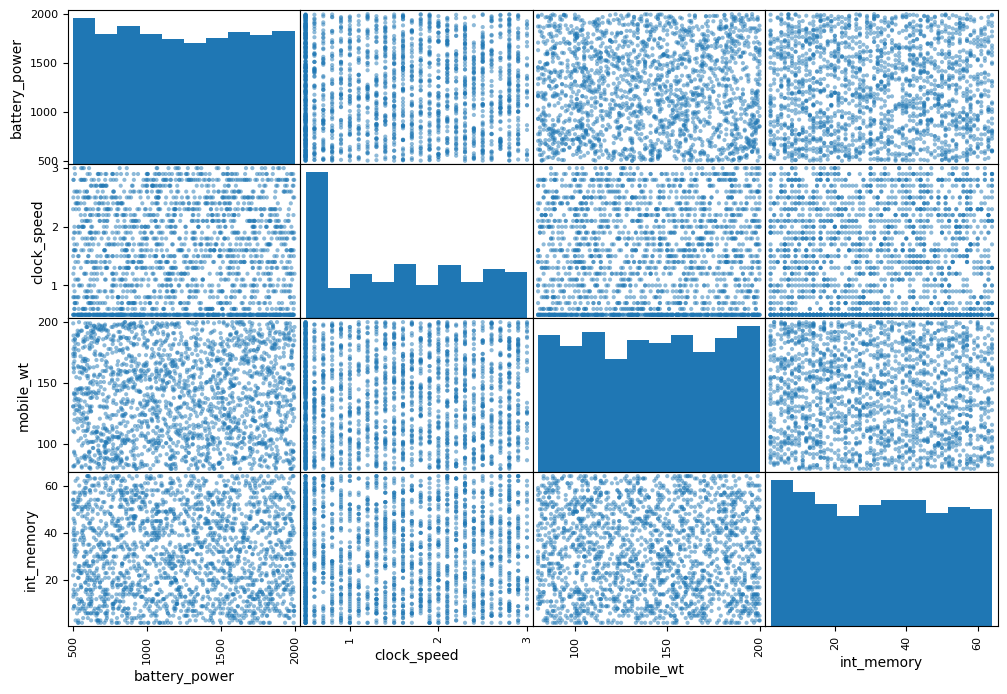

In [8]:
from pandas.plotting import scatter_matrix
attributes = ["battery_power", "clock_speed", "mobile_wt", "int_memory"]
scatter_matrix(data[attributes], figsize=(12, 8))

In [9]:
labels = data["price_range"].copy()
data = data.drop("price_range", axis=1)

In [10]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,19,0,0,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,6.0,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,6.0,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,14.0,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0


In [11]:
assert len(data) == len(labels)

In [15]:
for attrib in list(data.columns):
  if (data[attrib].isnull().values.any()):
    print(attrib)

fc
four_g
int_memory
m_dep
mobile_wt
n_cores
pc
px_height
px_width
ram
sc_h
sc_w


In [16]:
missing_categorical_columns = ["four_g", "n_cores"]

In [18]:
print(data["n_cores"].unique())

[ 2.  3.  5.  6.  1.  8.  4.  7. nan]


In [19]:
import pandas as pd

def fill_missing_values(df, categorical_columns=None):

    if categorical_columns is None:
        categorical_columns = []

    for column in df.columns:
        if column in categorical_columns:
            # If column is specified as categorical
            df[column].fillna(-1, inplace=True)

        else:
            median_value = df[column].median()
            df[column].fillna(median_value, inplace=True)

    return df



In [20]:
cleaned_data = fill_missing_values(data, missing_categorical_columns)

In [21]:
cleaned_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,19,0,0,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,6.0,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,6.0,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,14.0,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0


In [22]:
for attrib in list(cleaned_data.columns):
  print(cleaned_data[attrib].isnull().values.any())

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [29]:
num_attribs = ["battery_power", "clock_speed", "fc", "int_memory", "m_dep",
                "mobile_wt", "pc", "px_height", "px_width", "ram", "sc_h", "sc_w",
               "talk_time"]
cat_attribs = ["blue", "dual_sim", "four_g", "n_cores", "three_g", "touch_screen",
               "wifi"]

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

full_pipeline = ColumnTransformer([
("num", StandardScaler(), num_attribs),
("cat", OneHotEncoder(), cat_attribs),
])

data_prepared = full_pipeline.fit_transform(cleaned_data)

In [37]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(data_prepared, labels)

SGDClassifier(random_state=42)

In [41]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, data_prepared, labels, cv=5, scoring="accuracy")

array([0.7625, 0.78  , 0.7975, 0.7525, 0.785 ])

In [46]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, data_prepared, labels, cv=3)

In [49]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(labels, y_train_pred)

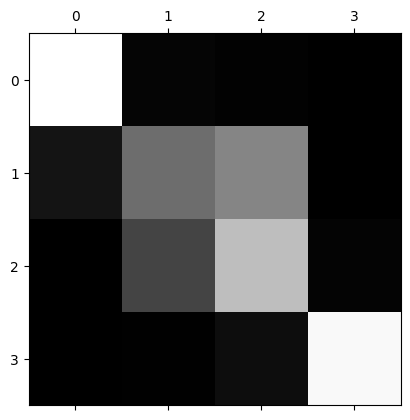

In [50]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [56]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

In [57]:
forest_clf.fit(data_prepared, labels)

RandomForestClassifier(random_state=42)

In [58]:
cross_val_score(forest_clf, data_prepared, labels, cv=3, scoring="accuracy")

array([0.84707646, 0.86056972, 0.84234234])

In [64]:
test_data = load_data(data_path, "test")

In [65]:
test_data_cleaned = fill_missing_values(test_data, missing_categorical_columns)
X_test = full_pipeline.fit_transform(test_data_cleaned)

In [67]:
from joblib import dump
dump(forest_clf, 'device_price_model.joblib')

['device_price_model.joblib']

In [68]:
!cp /content/device_price_model.joblib /content/drive/MyDrive